In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [130]:
current_datetime = datetime.datetime.now()


start = datetime.datetime(2014, 1, 1)
end = current_datetime.date()

In [131]:
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874271,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966293,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844954,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600


In [132]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51215441


In [133]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.253262,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.874271,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.966293,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.844954,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.951632,258529600


In [134]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


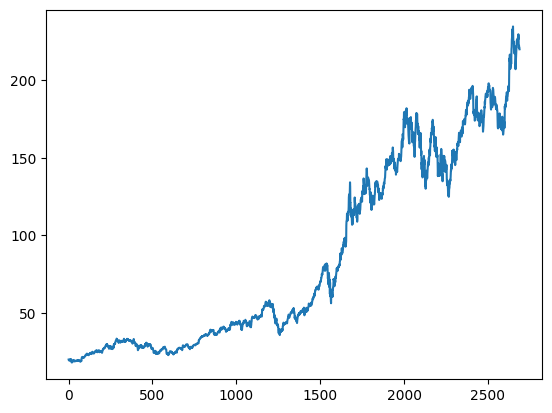

In [135]:
plt.plot(df.Close)

In [136]:
df

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600
...,...,...,...,...,...
2685,221.660004,221.779999,217.479996,220.850006,43840200
2686,221.630005,225.479996,221.520004,222.380005,36615400
2687,223.949997,225.240005,219.770004,220.820007,48423000
2688,220.820007,221.270004,216.710007,220.910004,67180000


In [137]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2685    204.8156
2686    205.2739
2687    205.7552
2688    206.2705
2689    206.7916
Name: Close, Length: 2690, dtype: float64

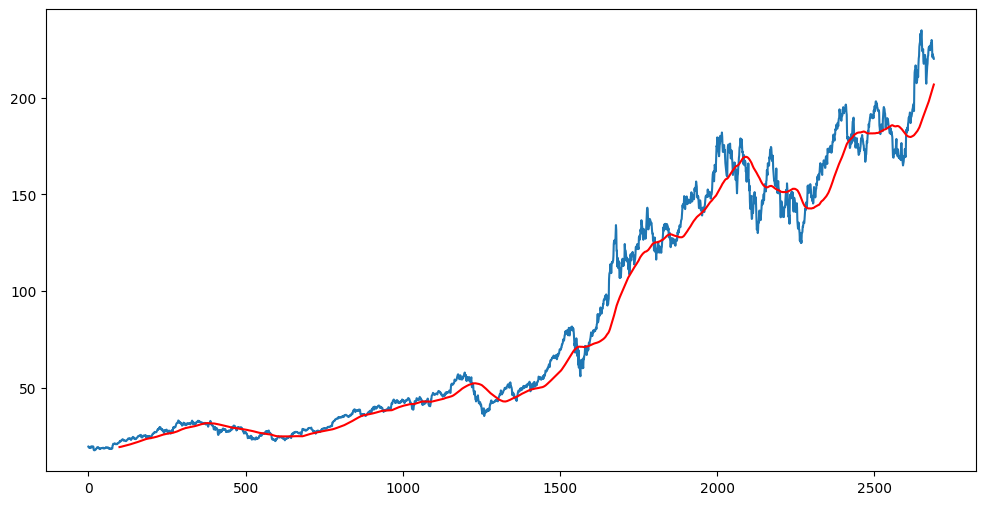

In [138]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.show()

In [139]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2685    194.44760
2686    194.61095
2687    194.76660
2688    194.91390
2689    195.06125
Name: Close, Length: 2690, dtype: float64

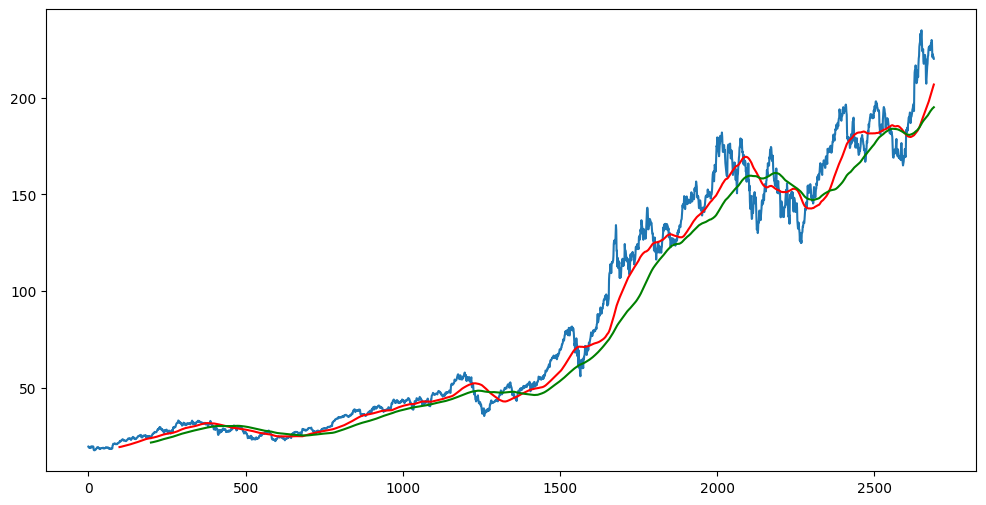

In [140]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [141]:
df.shape

(2690, 5)

In [142]:
# Splitting Data in Training and Testing

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [143]:
print(data_train.shape)
print(data_test.shape)


(1882, 1)
(808, 1)


In [144]:
data_train.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [145]:
data_test.head()

,Close
1882,133.410004
1883,133.110001
1884,134.779999
1885,136.330002
1886,136.960007


In [146]:
scaler = MinMaxScaler(feature_range=(0,1))

In [147]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.01520506],
       [0.01174225],
       [0.01258301],
       ...,
       [0.91333542],
       [0.92674204],
       [0.9245076 ]])

In [148]:
data_train_array.shape

(1882, 1)

In [149]:
x_train = []
y_train = []

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100 : i])
    y_train.append(data_train_array[i,0])

x_train,y_train = np.array(x_train) , np.array(y_train)

In [150]:
x_train.shape

(1782, 100, 1)

In [151]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)
               ))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [152]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0578
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0069
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0052
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 0.0052
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0046
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0044
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0041
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0035
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0033
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0033
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0034
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0030
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0035
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0030
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 

In [154]:
model.save('trend_model.h5')

In [155]:
data_test.head()

,Close
1882,133.410004
1883,133.110001
1884,134.779999
1885,136.330002
1886,136.960007


In [156]:
past_100_day = data_train.tail(100)

In [157]:
final_df = pd.concat([past_100_day, data_test], ignore_index=True)
final_df.head()

,Close
0,134.139999
1,134.990005
2,133.940002
3,137.389999
4,136.759995


In [158]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.15009284],
       [0.15726831],
       [0.14840453],
       [0.17752826],
       [0.17220997],
       [0.17347629],
       [0.16587872],
       [0.16064492],
       [0.15845014],
       [0.16047605],
       [0.14207328],
       [0.12223531],
       [0.11269631],
       [0.11404688],
       [0.08137767],
       [0.08019584],
       [0.07589057],
       [0.0390849 ],
       [0.04136418],
       [0.09648826],
       [0.07394903],
       [0.04811748],
       [0.03182506],
       [0.04271482],
       [0.        ],
       [0.03992905],
       [0.03055886],
       [0.04727333],
       [0.03942257],
       [0.0644099 ],
       [0.07774775],
       [0.07091002],
       [0.03520174],
       [0.03064323],
       [0.05934491],
       [0.05216951],
       [0.03148738],
       [0.03570822],
       [0.04094207],
       [0.04246158],
       [0.02988351],
       [0.04887726],
       [0.05605267],
       [0.08053352],
       [0.08315041],
       [0.09741685],
       [0.11818335],
       [0.140

In [159]:
input_data.shape

(908, 1)

In [160]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [161]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(808, 100, 1)
(808,)


In [162]:
# Making Predictions

In [163]:
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step


In [164]:
y_predicted.shape

(808, 1)

In [165]:
scaler.scale_

array([0.00844167])

In [166]:
scale_factor = 1/0.00844167
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

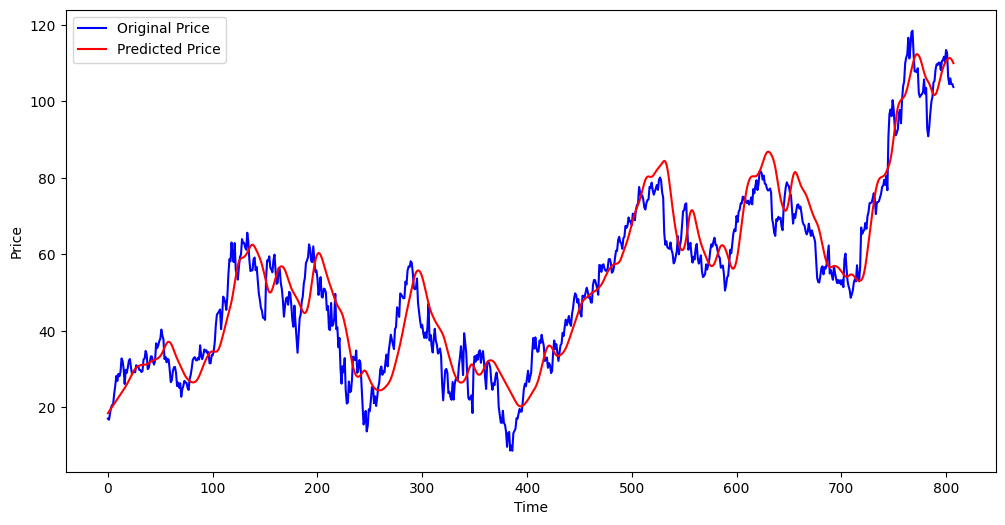

In [167]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()